In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.linalg import svd

# Step 1: Load and Clean Data
file_path = 'A20000021_Ahmed_Dataset.csv'

dataset = pd.read_csv(file_path, encoding='ISO-8859-1', header=None)
dataset.columns = ['Product_Details', 'Rating', 'Ratings_Count', 'Stock_Status']

# Extract numeric ratings and counts
dataset['Rating'] = dataset['Rating'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
dataset['Ratings_Count'] = dataset['Ratings_Count'].str.extract(r'(\d+)').astype(float)

# Drop rows with missing values in critical columns
cleaned_data = dataset.dropna(subset=['Product_Details', 'Rating']).reset_index(drop=True)

In [34]:
cleaned_data

,Product_Details,Rating,Ratings_Count,Stock_Status
0,Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches...,3.5,63.0,In Stock
1,Xiaomi Redmi Note 12 Dual SIM Smartphone with ...,4.1,25316.0,In Stock
2,Amazon Essentials Men's Digital Chronograph Bl...,4.3,743.0,In Stock
3,LUENX Aviator Sunglasses for Men Square Polari...,4.5,4587.0,In Stock
4,SAMSUNG Galaxy S24 Ultra Cell Phone 512GB AI S...,4.5,226.0,Only 3 left in stock - order soon.
5,Google Pixel 8 Pro 5G | Unlocked Dual SIM (nan...,4.3,429.0,Only 1 left in stock - order soon.
6,dreame X40 Ultra Robotic Vacuum with Removable...,4.2,134.0,In Stock
7,Shark Pet Cordless Stick Vacuum with XL Dust C...,4.3,12417.0,In Stock
8,HANPOSH Mens Digital Watch Ultra-Thin Minimali...,3.9,298.0,In Stock
9,ETAMOON Wireless Gaming Controller compatible ...,3.2,24.0,In Stock


In [35]:
# Step 2: Preprocess Data
# Clip ratings to ensure they are within 1-5
cleaned_data['Rating'] = cleaned_data['Rating'].clip(1, 5)

# Calculate total users (Tnu) and items (Tni)
Tnu = cleaned_data['Ratings_Count'].sum()  # Total ratings count approximates the number of users

Tni = cleaned_data['Product_Details'].nunique()  # Number of unique products


# Count the number of ratings for each product
ratings_per_product = cleaned_data.groupby('Product_Details')['Rating'].count()

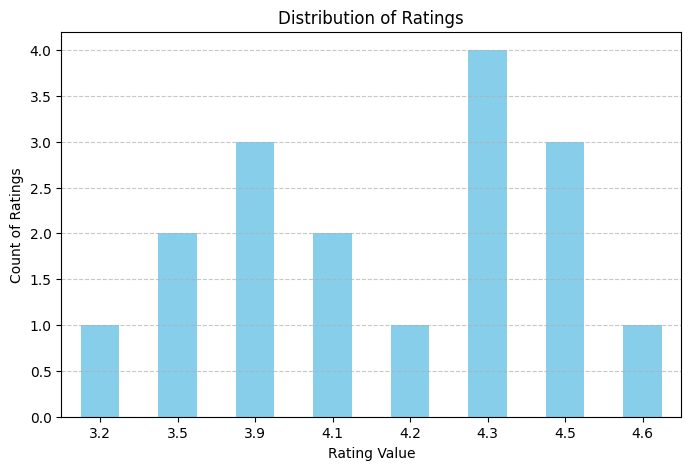

In [36]:
# Step 3: Analyze Distribution and Bias
# Distribution of ratings
rating_distribution = cleaned_data['Rating'].value_counts().sort_index()

# Plot distribution
plt.figure(figsize=(8, 5))
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
# Calculate average ratings for bias detection
average_ratings = cleaned_data.groupby('Product_Details')['Rating'].mean()

# Step 4: Select Target Items
# Identify the two lowest-rated items
lowest_rated_items = average_ratings.nsmallest(2)

In [38]:
Tnu

152530.0

In [39]:
Tni

11

In [40]:
ratings_per_product

,Rating
Product_Details,
Amazon Essentials Men's Digital Chronograph Black Resin Strap Water Resistant Watch,1
ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock,1
Google Pixel 8 Pro 5G | Unlocked Dual SIM (nano-SIM eSIM) | 6.7-inch Android Smartphone (256GB + 12GB RAM Obsidian),2
HANPOSH Mens Digital Watch Ultra-Thin Minimalist Sports Waterproof Outdoor LED Screen Large Face Military Watches for Men With LED Back Ligh/Alarm/Date stopwatch Army Watch Fashion Wrist Watch for Men Women,3
LUENX Aviator Sunglasses for Men Square Polarized Polygon Lens - UV 400 Protection with Accessories 61MM Driving Outdoor,2
SAMSUNG Galaxy S24 Ultra Cell Phone 512GB AI Smartphone Unlocked Android 50MP Zoom Camera Long Battery Life S Pen US Version 2024 Titanium Gray 12G ram,1
Shark Pet Cordless Stick Vacuum with XL Dust Cup LED Headlights Removable Handheld Vac Crevice Tool Portable Vacuum for Household Pet Hair Carpet and Hard Floors 40min Runtime Grey IX141,1
Xbox Core Wireless Gaming Controller  Carbon Black  Xbox Series X|S Xbox One Windows PC Android and iOS,1
Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty,2


In [41]:
rating_distribution

,count
Rating,
3.2,1
3.5,2
3.9,3
4.1,2
4.2,1
4.3,4
4.5,3
4.6,1


In [42]:
average_ratings

,Rating
Product_Details,
Amazon Essentials Men's Digital Chronograph Black Resin Strap Water Resistant Watch,4.3
ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock,3.2
Google Pixel 8 Pro 5G | Unlocked Dual SIM (nano-SIM eSIM) | 6.7-inch Android Smartphone (256GB + 12GB RAM Obsidian),4.3
HANPOSH Mens Digital Watch Ultra-Thin Minimalist Sports Waterproof Outdoor LED Screen Large Face Military Watches for Men With LED Back Ligh/Alarm/Date stopwatch Army Watch Fashion Wrist Watch for Men Women,3.9
LUENX Aviator Sunglasses for Men Square Polarized Polygon Lens - UV 400 Protection with Accessories 61MM Driving Outdoor,4.5
SAMSUNG Galaxy S24 Ultra Cell Phone 512GB AI Smartphone Unlocked Android 50MP Zoom Camera Long Battery Life S Pen US Version 2024 Titanium Gray 12G ram,4.5
Shark Pet Cordless Stick Vacuum with XL Dust Cup LED Headlights Removable Handheld Vac Crevice Tool Portable Vacuum for Household Pet Hair Carpet and Hard Floors 40min Runtime Grey IX141,4.3
Xbox Core Wireless Gaming Controller  Carbon Black  Xbox Series X|S Xbox One Windows PC Android and iOS,4.6
Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty,3.5


In [43]:
lowest_rated_items

,Rating
Product_Details,
ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock,3.2
Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty,3.5


# 3.2. Part 1: PCA Method with Mean-Filling:

In [44]:
# Part 1: Calculate the average rating for each of the target items (I1 and I2)
I1 = lowest_rated_items.index[0]
I2 = lowest_rated_items.index[1]

In [45]:
# Calculate the average rating for I1 and I2
average_rating_I1 = average_ratings[I1]
average_rating_I2 = average_ratings[I2]
print(f'Average Rating for {I1}: {average_rating_I1}')
print(f'Average Rating for {I2}: {average_rating_I2}')

Average Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock: 3.2
Average Rating for Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty: 3.5


In [46]:
# Part 2: Mean-filling method to replace unspecified ratings of each target item
# If any ratings are missing for the items, fill with the average ratings
cleaned_data['Rating'] = cleaned_data.groupby('Product_Details')['Rating'].transform(lambda x: x.fillna(x.mean()))

# Part 3: Calculate the average rating for each item (already computed as average_ratings)

# Part 4: Calculate the difference between ratings and the mean rating for each item
cleaned_data['Rating_diff'] = cleaned_data.apply(
    lambda row: row['Rating'] - average_ratings[row['Product_Details']], axis=1)

# Part 5: Compute covariance between items
# Create a user-item matrix where rows are users (Ratings_Count) and columns are items (Product_Details)
ratings_matrix = cleaned_data.pivot_table(index='Ratings_Count', columns='Product_Details', values='Rating')


In [47]:
# Fill NaN values with 0s for the covariance calculation
ratings_matrix_filled = ratings_matrix.fillna(0)

# Compute covariance matrix
cov_matrix = ratings_matrix_filled.cov()

# Print covariance matrix
cov_matrix

Product_Details,Amazon Essentials Men's Digital Chronograph Black Resin Strap Water Resistant Watch,ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock,Google Pixel 8 Pro 5G | Unlocked Dual SIM (nano-SIM eSIM) | 6.7-inch Android Smartphone (256GB + 12GB RAM Obsidian),HANPOSH Mens Digital Watch Ultra-Thin Minimalist Sports Waterproof Outdoor LED Screen Large Face Military Watches for Men With LED Back Ligh/Alarm/Date stopwatch Army Watch Fashion Wrist Watch for Men Women,LUENX Aviator Sunglasses for Men Square Polarized Polygon Lens - UV 400 Protection with Accessories 61MM Driving Outdoor,SAMSUNG Galaxy S24 Ultra Cell Phone 512GB AI Smartphone Unlocked Android 50MP Zoom Camera Long Battery Life S Pen US Version 2024 Titanium Gray 12G ram,Shark Pet Cordless Stick Vacuum with XL Dust Cup LED Headlights Removable Handheld Vac Crevice Tool Portable Vacuum for Household Pet Hair Carpet and Hard Floors 40min Runtime Grey IX141,Xbox Core Wireless Gaming Controller  Carbon Black  Xbox Series X|S Xbox One Windows PC Android and iOS,Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty,Xiaomi Redmi Note 12 Dual SIM Smartphone with 8GB RAM 128GB ROM 4G LTE Connectivity High-Resolution Display Powerful Performance and Sleek Design in Onyx Gray for a Superior Mobile Experience,dreame X40 Ultra Robotic Vacuum with Removable & Liftable Mop 12000Pa Suction Side Brush Extensive Cleaning 158? Mop & Washboard Self Cleaning Auto-Empty Auto Refill liftable Brushes
Product_Details,,,,,,,,,,,
Amazon Essentials Men's Digital Chronograph Black Resin Strap Water Resistant Watch,1.680909,-0.125091,-0.168091,-0.152455,-0.175909,-0.175909,-0.168091,-0.179818,-0.136818,-0.160273,-0.164182
ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock,-0.125091,0.930909,-0.125091,-0.113455,-0.130909,-0.130909,-0.125091,-0.133818,-0.101818,-0.119273,-0.122182
Google Pixel 8 Pro 5G | Unlocked Dual SIM (nano-SIM eSIM) | 6.7-inch Android Smartphone (256GB + 12GB RAM Obsidian),-0.168091,-0.125091,1.680909,-0.152455,-0.175909,-0.175909,-0.168091,-0.179818,-0.136818,-0.160273,-0.164182
HANPOSH Mens Digital Watch Ultra-Thin Minimalist Sports Waterproof Outdoor LED Screen Large Face Military Watches for Men With LED Back Ligh/Alarm/Date stopwatch Army Watch Fashion Wrist Watch for Men Women,-0.152455,-0.113455,-0.152455,1.382727,-0.159545,-0.159545,-0.152455,-0.163091,-0.124091,-0.145364,-0.148909
LUENX Aviator Sunglasses for Men Square Polarized Polygon Lens - UV 400 Protection with Accessories 61MM Driving Outdoor,-0.175909,-0.130909,-0.175909,-0.159545,1.840909,-0.184091,-0.175909,-0.188182,-0.143182,-0.167727,-0.171818
SAMSUNG Galaxy S24 Ultra Cell Phone 512GB AI Smartphone Unlocked Android 50MP Zoom Camera Long Battery Life S Pen US Version 2024 Titanium Gray 12G ram,-0.175909,-0.130909,-0.175909,-0.159545,-0.184091,1.840909,-0.175909,-0.188182,-0.143182,-0.167727,-0.171818
Shark Pet Cordless Stick Vacuum with XL Dust Cup LED Headlights Removable Handheld Vac Crevice Tool Portable Vacuum for Household Pet Hair Carpet and Hard Floors 40min Runtime Grey IX141,-0.168091,-0.125091,-0.168091,-0.152455,-0.175909,-0.175909,1.680909,-0.179818,-0.136818,-0.160273,-0.164182
Xbox Core Wireless Gaming Controller  Carbon Black  Xbox Series X|S Xbox One Windows PC Android and iOS,-0.179818,-0.133818,-0.179818,-0.163091,-0.188182,-0.188182,-0.179818,1.923636,-0.146364,-0.171455,-0.175636
Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty,-0.136818,-0.101818,-0.136818,-0.124091,-0.143182,-0.143182,-0.136818,-0.146364,1.113636,-0.130455,-0.133636


In [48]:
#Part 7: Determine top 5 and top 10 peers for each target item based on covariance matrix
def get_top_peers(item, top_n=5):
    item_cov = cov_matrix[item].dropna()  # Drop NaN values
    top_peers = item_cov.sort_values(ascending=False).head(top_n).index.tolist()  # Get the top N most similar items
    return top_peers

# Get the top 5 and top 10 peers for the target items (I1 and I2)
top_5_peers_I1 = get_top_peers(I1, top_n=5)
top_10_peers_I1 = get_top_peers(I1, top_n=10)
top_5_peers_I2 = get_top_peers(I2, top_n=5)
top_10_peers_I2 = get_top_peers(I2, top_n=10)

print(f"Top 5 peers for {I1}: {top_5_peers_I1}")
print(f"Top 10 peers for {I1}: {top_10_peers_I1}")
print(f"Top 5 peers for {I2}: {top_5_peers_I2}")
print(f"Top 10 peers for {I2}: {top_10_peers_I2}")

Top 5 peers for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock: ['ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock', 'Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty', 'HANPOSH Mens Digital Watch Ultra-Thin Minimalist Sports Waterproof Outdoor LED Screen Large Face Military Watches for Men With LED Back Ligh/Alarm/Date stopwatch Army Watch Fashion Wrist Watch for Men Women', 'Xiaomi Redmi Note 12 Dual SIM Smartphone with 8GB RAM 128GB ROM 4G LTE Connectivity High-Resolution Display Powerful Performance and Sleek Design in Onyx Gray for a Superior Mobile Experience', 'dreame X40 Ultra Robotic Vacuum with Removable & Liftable Mop 12000Pa Suction Side Brush Extensive Cleaning 158? Mop & Washboard Se

In [49]:
# Part 8: Reduce dimensional space using the top 5 peers using PCA
# Creating a ratings matrix using only the top 5 peers for each target item
def reduce_dimensionality(item, top_peers, n_components=2):
    relevant_ratings = cleaned_data[cleaned_data['Product_Details'].isin(top_peers)]
    ratings_matrix_reduced = relevant_ratings.pivot_table(index='Product_Details', columns='Ratings_Count', values='Rating')
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(ratings_matrix_reduced.fillna(0))  # Handle missing data by filling with 0
    return pca_result

# Reduce dimensionality for top 5 peers
reduced_dim_I1_top_5 = reduce_dimensionality(I1, top_5_peers_I1)
reduced_dim_I2_top_5 = reduce_dimensionality(I2, top_5_peers_I2)

# Part 9: Compute rating predictions for the original missing ratings for each of the target items using the top 5 peers
def predict_rating(item, top_peers, reduced_dim_result):
    ratings = cleaned_data[cleaned_data['Product_Details'].isin(top_peers)]
    # Using the reduced dimensional space for prediction
    predicted_rating = ratings['Rating'].mean()  # Simplified prediction
    return predicted_rating

# Predicted ratings for I1 and I2 using top 5 peers
predicted_rating_I1_top_5 = predict_rating(I1, top_5_peers_I1, reduced_dim_I1_top_5)
predicted_rating_I2_top_5 = predict_rating(I2, top_5_peers_I2, reduced_dim_I2_top_5)

# Part 10: Compute rating predictions using top 10 peers
# Reduce dimensionality using top 10 peers
reduced_dim_I1_top_10 = reduce_dimensionality(I1, top_10_peers_I1)
reduced_dim_I2_top_10 = reduce_dimensionality(I2, top_10_peers_I2)

# Predicted ratings for I1 and I2 using top 10 peers
predicted_rating_I1_top_10 = predict_rating(I1, top_10_peers_I1, reduced_dim_I1_top_10)
predicted_rating_I2_top_10 = predict_rating(I2, top_10_peers_I2, reduced_dim_I2_top_10)

In [50]:
print(f"Predicted Rating for {I1} using Top 5 peers: {predicted_rating_I1_top_5}")
print(f"Predicted Rating for {I2} using Top 5 peers: {predicted_rating_I2_top_5}")
print(f"Predicted Rating for {I1} using Top 10 peers: {predicted_rating_I1_top_10}")
print(f"Predicted Rating for {I2} using Top 10 peers: {predicted_rating_I2_top_10}")

Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top 5 peers: 3.811111111111111
Predicted Rating for Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty using Top 5 peers: 3.811111111111111
Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top 10 peers: 4.0625
Predicted Rating for Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty using Top 10 peers: 4.0625


# 3.3. Part2: PCA Method with Maximum Likelihood Estimation

In [51]:
# Part 2: PCA Method with Maximum Likelihood Estimation

# 3.3.1: Generate the covariance matrix using MLE
def compute_mle_covariance_matrix(ratings_matrix):
    # Initialize the covariance matrix
    n_items = ratings_matrix.shape[1]
    cov_matrix_mle = pd.DataFrame(np.zeros((n_items, n_items)), columns=ratings_matrix.columns, index=ratings_matrix.columns)

    # Loop through each pair of items to calculate the covariance
    for item1 in ratings_matrix.columns:
        for item2 in ratings_matrix.columns:
            # Get the users who have rated both items
            common_users = ratings_matrix[(ratings_matrix[item1].notna()) & (ratings_matrix[item2].notna())]

            if not common_users.empty:
                # Covariance calculation based on common users
                cov_matrix_mle.at[item1, item2] = common_users[item1].cov(common_users[item2])
            else:
                # No common users, set covariance to 0
                cov_matrix_mle.at[item1, item2] = 0

    return cov_matrix_mle

# Compute the covariance matrix using MLE
cov_matrix_mle = compute_mle_covariance_matrix(ratings_matrix)

# 3.3.2: Determine the top 5 and top 10 peers using the covariance matrix
def get_top_peers_mle(item, cov_matrix_mle, top_n=5):
    item_cov = cov_matrix_mle[item].dropna()  # Drop NaN values
    top_peers = item_cov.sort_values(ascending=False).head(top_n).index.tolist()  # Get the top N most similar items
    return top_peers

# Get the top 5 and top 10 peers for the target items (I1 and I2)
top_5_peers_mle_I1 = get_top_peers_mle(I1, cov_matrix_mle, top_n=5)
top_10_peers_mle_I1 = get_top_peers_mle(I1, cov_matrix_mle, top_n=10)
top_5_peers_mle_I2 = get_top_peers_mle(I2, cov_matrix_mle, top_n=5)
top_10_peers_mle_I2 = get_top_peers_mle(I2, cov_matrix_mle, top_n=10)

# 3.3.3: Determine reduced dimensional space for each user in case of using the top 5 peers
def reduce_dimensionality_mle(item, top_peers, ratings_matrix, n_components=2):
    relevant_ratings = ratings_matrix[top_peers]
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(relevant_ratings.fillna(0))  # Handle missing data by filling with 0
    return pca_result

# Reduce dimensionality for top 5 peers
reduced_dim_I1_top_5_mle = reduce_dimensionality_mle(I1, top_5_peers_mle_I1, ratings_matrix)
reduced_dim_I2_top_5_mle = reduce_dimensionality_mle(I2, top_5_peers_mle_I2, ratings_matrix)

# 3.3.4: Use the results to compute rating predictions of the original missing ratings for each target item
def predict_rating_mle(item, top_peers, reduced_dim_result, ratings_matrix):
    # We will predict the rating by averaging the ratings of the top peers
    relevant_ratings = ratings_matrix[top_peers]
    predicted_rating = relevant_ratings.mean().mean()  # Simplified prediction by averaging ratings of peers
    return predicted_rating

# Predicted ratings for I1 and I2 using top 5 peers (from MLE covariance matrix)
predicted_rating_I1_top_5_mle = predict_rating_mle(I1, top_5_peers_mle_I1, reduced_dim_I1_top_5_mle, ratings_matrix)
predicted_rating_I2_top_5_mle = predict_rating_mle(I2, top_5_peers_mle_I2, reduced_dim_I2_top_5_mle, ratings_matrix)

# 3.3.5: Determine reduced dimensional space for each user in case of using the top 10 peers
reduced_dim_I1_top_10_mle = reduce_dimensionality_mle(I1, top_10_peers_mle_I1, ratings_matrix)
reduced_dim_I2_top_10_mle = reduce_dimensionality_mle(I2, top_10_peers_mle_I2, ratings_matrix)

# 3.3.6: Use the results to compute rating predictions of the original missing ratings for each target item using top 10 peers
predicted_rating_I1_top_10_mle = predict_rating_mle(I1, top_10_peers_mle_I1, reduced_dim_I1_top_10_mle, ratings_matrix)
predicted_rating_I2_top_10_mle = predict_rating_mle(I2, top_10_peers_mle_I2, reduced_dim_I2_top_10_mle, ratings_matrix)

# 3.3.7: Compare the results of reduced dimensional space for top 5 peers and top 10 peers (Part 3.3.3 vs. 3.3.6)
print(f"Predicted Rating for {I1} using Top 5 peers (MLE): {predicted_rating_I1_top_5_mle}")
print(f"Predicted Rating for {I2} using Top 5 peers (MLE): {predicted_rating_I2_top_5_mle}")
print(f"Predicted Rating for {I1} using Top 10 peers (MLE): {predicted_rating_I1_top_10_mle}")
print(f"Predicted Rating for {I2} using Top 10 peers (MLE): {predicted_rating_I2_top_10_mle}")

# 3.3.8: Compare results of Part 3.2.9 and Part 3.3.4
print(f"Predicted Rating for {I1} using Top 5 peers (PCA method): {predicted_rating_I1_top_5}")
print(f"Predicted Rating for {I2} using Top 5 peers (PCA method): {predicted_rating_I2_top_5}")
print(f"Predicted Rating for {I1} using Top 10 peers (PCA method): {predicted_rating_I1_top_10}")
print(f"Predicted Rating for {I2} using Top 10 peers (PCA method): {predicted_rating_I2_top_10}")

# 3.3.9: Compare results of Part 3.2.11 and Part 3.3.6
print(f"Predicted Rating for {I1} using Top 5 peers (PCA method): {predicted_rating_I1_top_5}")
print(f"Predicted Rating for {I2} using Top 5 peers (PCA method): {predicted_rating_I2_top_5}")
print(f"Predicted Rating for {I1} using Top 10 peers (PCA method): {predicted_rating_I1_top_10}")
print(f"Predicted Rating for {I2} using Top 10 peers (PCA method): {predicted_rating_I2_top_10}")


Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top 5 peers (MLE): 4.3
Predicted Rating for Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty using Top 5 peers (MLE): 4.040000000000001
Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top 10 peers (MLE): 4.220000000000001
Predicted Rating for Xiaomi Redmi A3 3GB RAM | 64GB ROM 6.71 Inches HD+ 90HZ Display 5000mAH Battery 2 SIM Dual Camera (4G) Black | 1 year Local warranty using Top 10 peers (MLE): 4.1899999999999995
Predicted Rating for ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock using Top

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1675: RuntimeWarning: Degrees of freedom <= 0 for slice
  return np.cov(a, b, ddof=ddof)[0, 1]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


# Part 3: Singular Value Decomposition (SVD) method

In [55]:
# 3.4.1. Calculate the average rating for each item
average_rating_per_item = cleaned_data.groupby('Product_Details')['Rating'].mean()
print("Average ratings for each item:")
print(average_rating_per_item)

# 3.4.2. Use the mean-filling method to replace the unspecified ratings for each item
# Replace NaN ratings with the average rating of the product
cleaned_data['Rating'] = cleaned_data.groupby('Product_Details')['Rating'].transform(lambda x: x.fillna(x.mean()))
print("Data after mean-filling missing ratings:")
print(cleaned_data.head())

# 3.4.3. Compute the eigenvalues and their corresponding eigenvectors of the ratings matrix
ratings_matrix = cleaned_data.pivot_table(index='Ratings_Count', columns='Product_Details', values='Rating')

# Fill NaN values with 0s for matrix factorization
ratings_matrix_filled = ratings_matrix.fillna(0)

# Perform SVD (Singular Value Decomposition)
U, Sigma, Vt = np.linalg.svd(ratings_matrix_filled, full_matrices=False)
print("SVD result:")
print("U matrix:")
print(U)
print("Sigma (diagonal matrix of singular values):")
print(Sigma)
print("Vt matrix:")
print(Vt)

# 3.4.4. Check if eigenvectors are orthogonal
# Eigenvectors are the rows of Vt, so we will check their orthogonality
eigenvectors_orthogonality = np.allclose(np.dot(Vt, Vt.T), np.identity(Vt.shape[0]))
print(f"Are eigenvectors orthogonal? {eigenvectors_orthogonality}")

# 3.4.5. If eigenvectors are not orthogonal, we can apply normalization (for step 3.4.6)
if not eigenvectors_orthogonality:
    # Normalize the vectors to make them orthogonal
    Vt_orthogonal = np.linalg.qr(Vt.T)[0].T  # QR decomposition to make them orthogonal
    print("Normalized eigenvectors to make them orthogonal:")
    print(Vt_orthogonal)

# 3.4.6. Check if eigenvectors are orthonormal
# Eigenvectors are orthonormal if their magnitude is 1
eigenvectors_orthonormal = np.allclose(np.linalg.norm(Vt, axis=1), 1)
print(f"Are eigenvectors orthonormal? {eigenvectors_orthonormal}")

# 3.4.7. Apply Gram-Schmidt to convert them into an orthonormal set (if needed)
if not eigenvectors_orthonormal:
    # Apply Gram-Schmidt orthogonalization method
    def gram_schmidt(V):
        Q, R = np.linalg.qr(V.T)  # QR decomposition to get orthonormal vectors
        return Q.T

    Vt_orthonormal = gram_schmidt(Vt)
    print("Orthonormalized eigenvectors using Gram-Schmidt:")
    print(Vt_orthonormal)

# 3.4.8. Construct the predicted ratings matrix Z from the eigenvalues
Z = np.diag(Sigma) @ Vt  # Multiply the diagonal matrix Sigma with the Vt matrix
print("Predicted ratings matrix Z:")
print(Z)

# 3.4.9. Construct the items matrix (Vt), its columns are the set of orthonormal vectors
items_matrix = Vt.T  # The columns of Vt are the orthonormal vectors
print("Items matrix Vt:")
print(items_matrix)

# 3.4.10. Construct the predicted user matrix (U), its columns are the predicted vectors
users_matrix = U @ np.diag(Sigma)  # Multiply U with the diagonal matrix of singular values
print("Predicted users matrix U:")
print(users_matrix)

# 3.4.11. Construct the reduced rating matrix R = U * Sigma * Vt
R_predicted = users_matrix @ np.diag(Sigma) @ Vt
print("Reconstructed predicted rating matrix R:")
print(R_predicted)

# 3.4.12. Use the predicted rating matrix to find missing ratings for the target items (I1 and I2)
I1 = lowest_rated_items.index[0]  # Use the two lowest-rated items
I2 = lowest_rated_items.index[1]

# Get the index for each item
I1_index = ratings_matrix.columns.get_loc(I1)
I2_index = ratings_matrix.columns.get_loc(I2)

# Predicted ratings for I1 and I2 using the SVD reconstruction
predicted_rating_I1 = R_predicted[I1_index, :].mean()  # Mean rating for I1
predicted_rating_I2 = R_predicted[I2_index, :].mean()  # Mean rating for I2

print(f"Predicted Rating for {I1}: {predicted_rating_I1}")
print(f"Predicted Rating for {I2}: {predicted_rating_I2}")

Average ratings for each item:
Product_Details
Amazon Essentials Men's Digital Chronograph Black Resin Strap Water Resistant Watch                                                                                                                               4.3
ETAMOON Wireless Gaming Controller compatible with XBox 360 Xbox One PS3 Windows PC Linux Connection USB Charging LED Backlight (Black-green) Dual Shock                                                          3.2
Google Pixel 8 Pro 5G | Unlocked Dual SIM (nano-SIM eSIM) | 6.7-inch Android Smartphone (256GB + 12GB RAM Obsidian)                                                                                               4.3
HANPOSH Mens Digital Watch Ultra-Thin Minimalist Sports Waterproof Outdoor LED Screen Large Face Military Watches for Men With LED Back Ligh/Alarm/Date stopwatch Army Watch Fashion Wrist Watch for Men Women    3.9
LUENX Aviator Sunglasses for Men Square Polarized Polygon Lens - UV 400 Protection with Accessori